Mounted at /content/drive


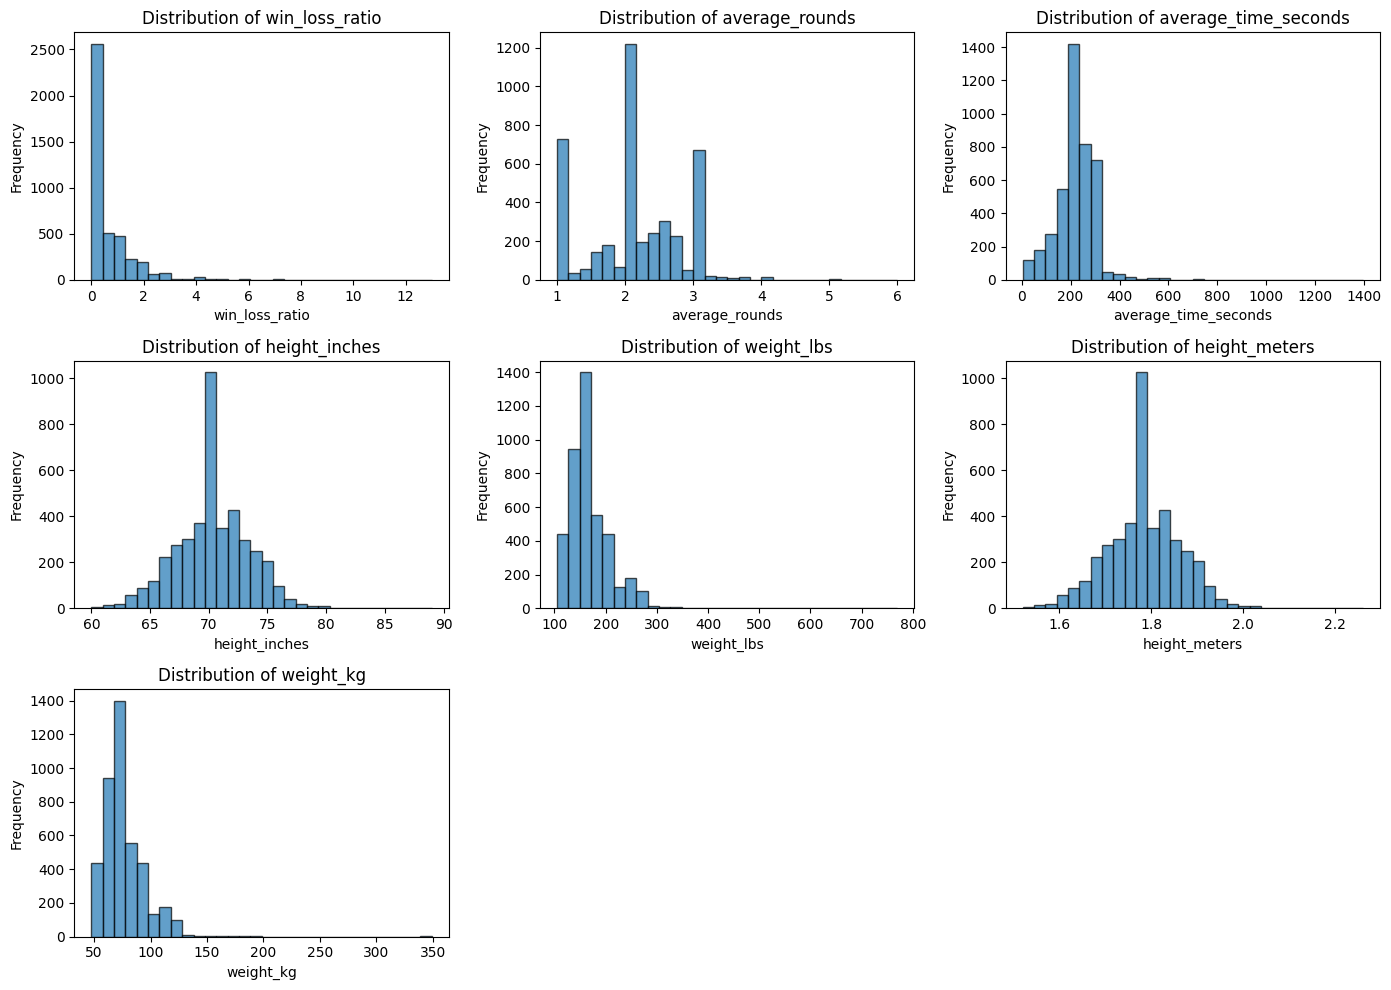

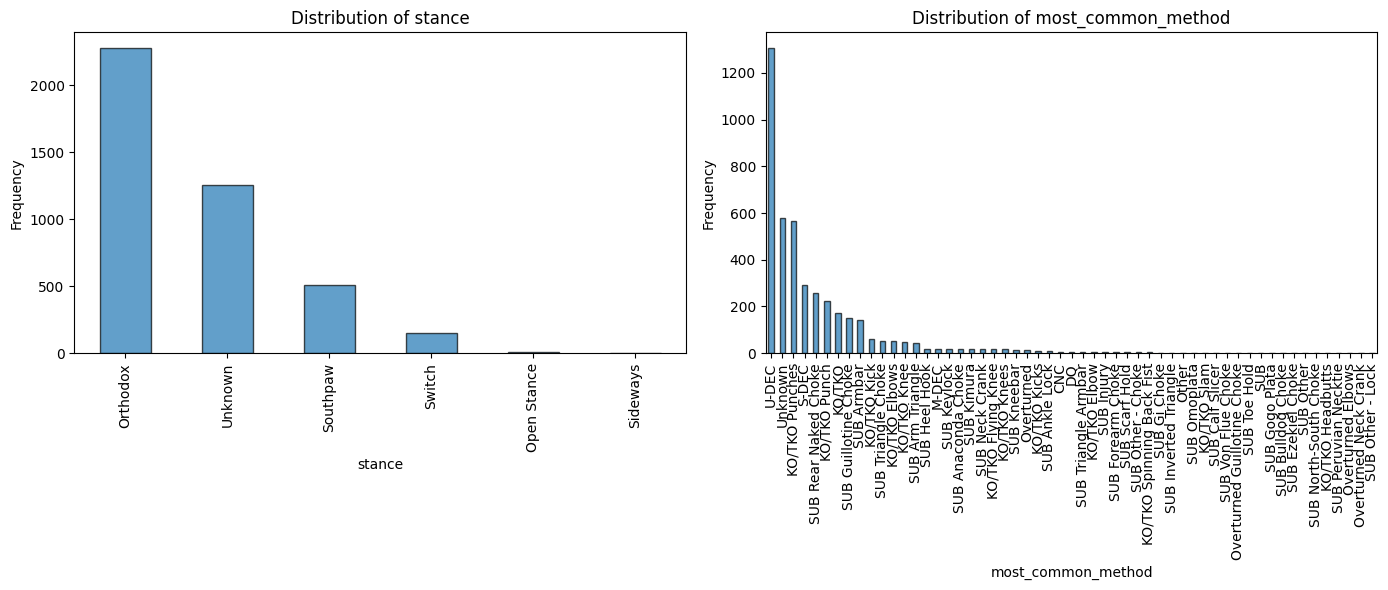

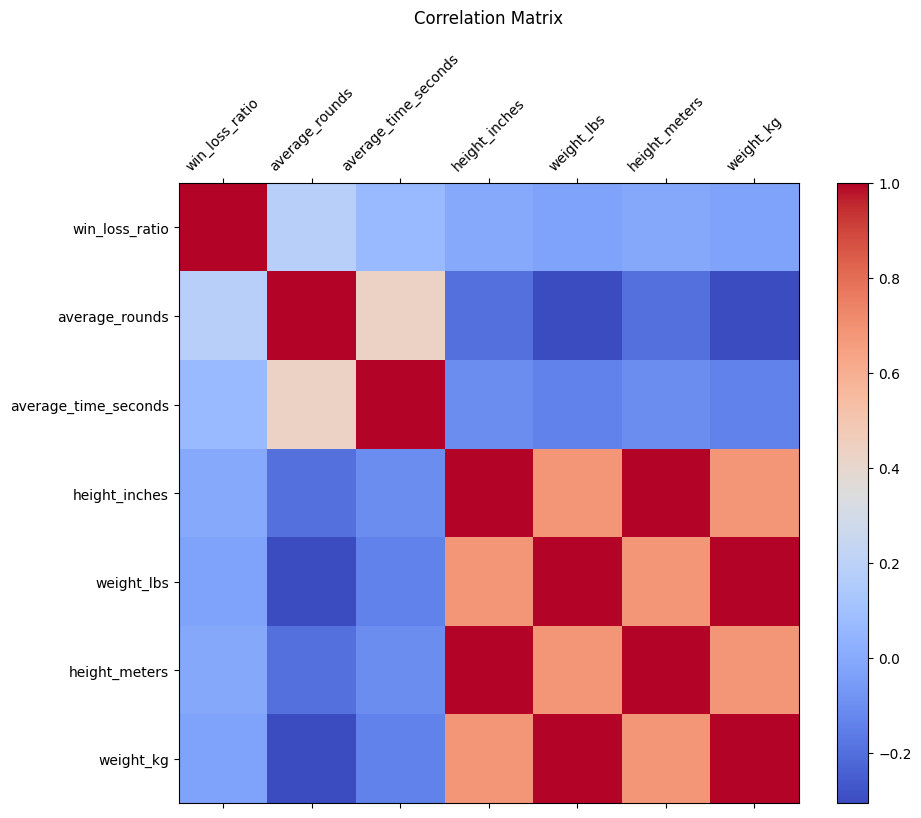

Mean Squared Error: 1.5201913582177975
R-squared: 0.06319635610685836


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/My Drive/merged_ufc_fighters.csv'
data = pd.read_csv(file_path)

# Data Cleaning
# Replace missing values in 'stance' and 'most_common_method' with 'Unknown'
data['stance'].fillna('Unknown', inplace=True)
data['most_common_method'].fillna('Unknown', inplace=True)

# Replace missing values in numerical columns with the median of the respective columns
numerical_columns = ['win_loss_ratio', 'average_rounds', 'average_time_seconds', 'height_inches', 'weight_lbs', 'height_meters', 'weight_kg']
for column in numerical_columns:
    data[column].fillna(data[column].median(), inplace=True)

# Exploratory Data Analysis (EDA)
# Plot distribution of numerical variables
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot distribution of categorical variables
categorical_columns = ['stance', 'most_common_method']
plt.figure(figsize=(14, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    data[column].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot correlation matrix
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix', pad=20)
plt.show()

# Feature Engineering and Model Building
# One-hot encode categorical variables
encoded_data = pd.get_dummies(data, columns=['stance', 'most_common_method'])

# Create a BMI-like feature
encoded_data['bmi_like'] = encoded_data['weight_kg'] / (encoded_data['height_meters'] ** 2)

# Define features and target variable
X = encoded_data.drop(columns=['fighter', 'win_loss_ratio', 'past_fights'])
y = encoded_data['win_loss_ratio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


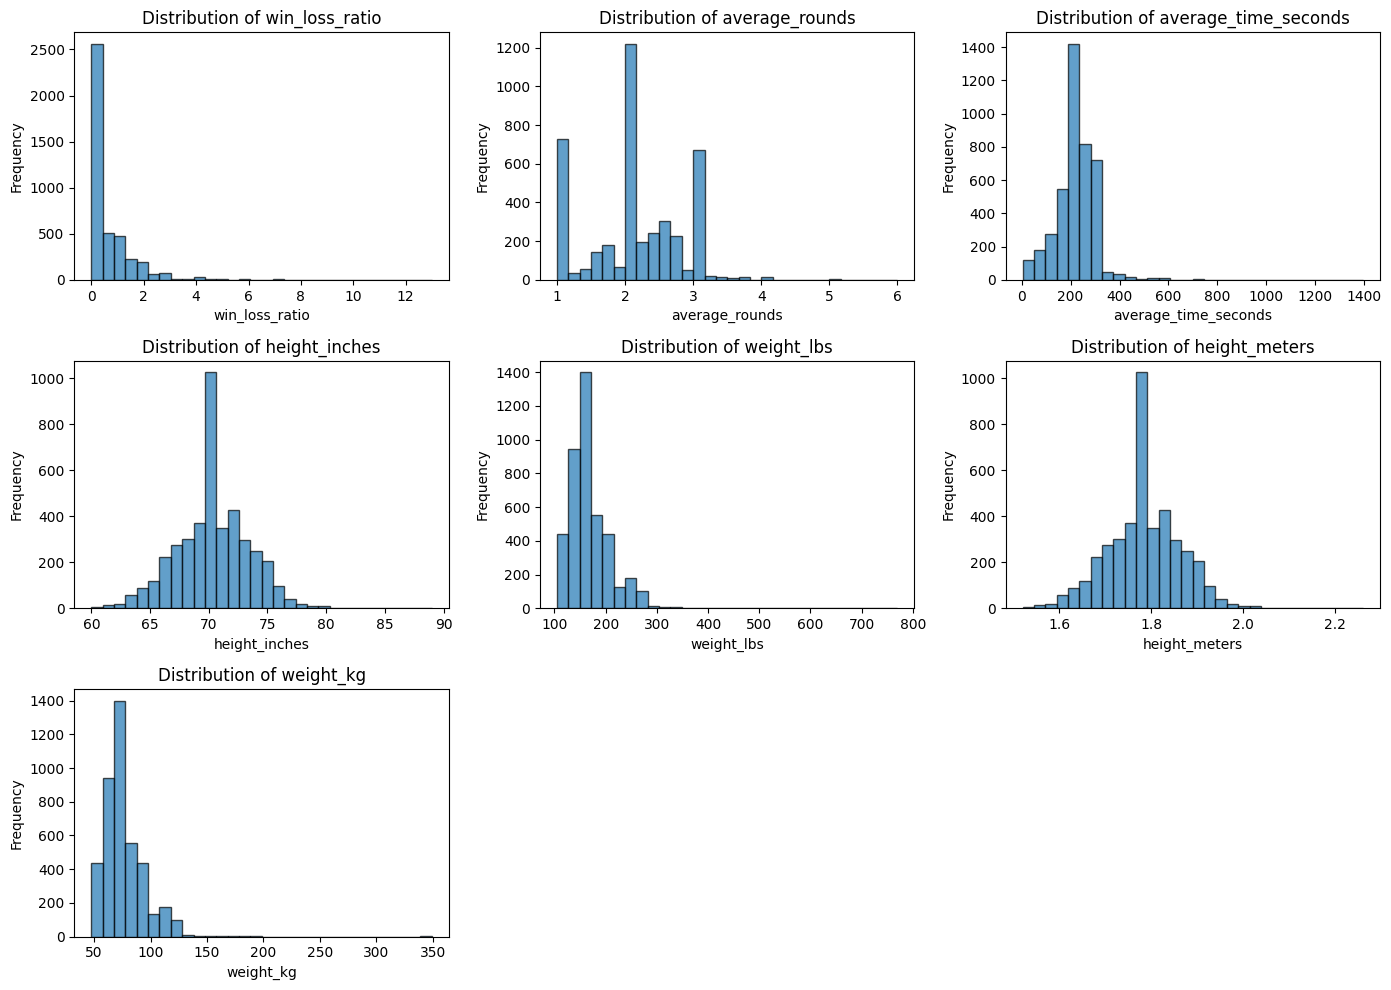

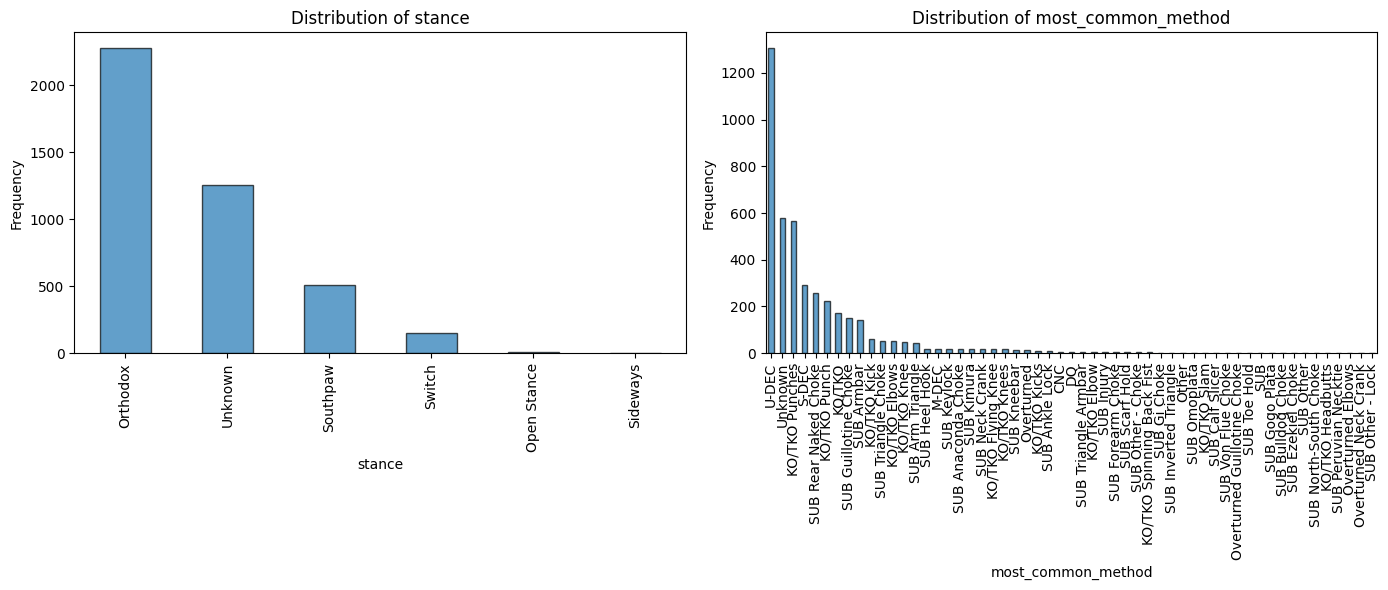

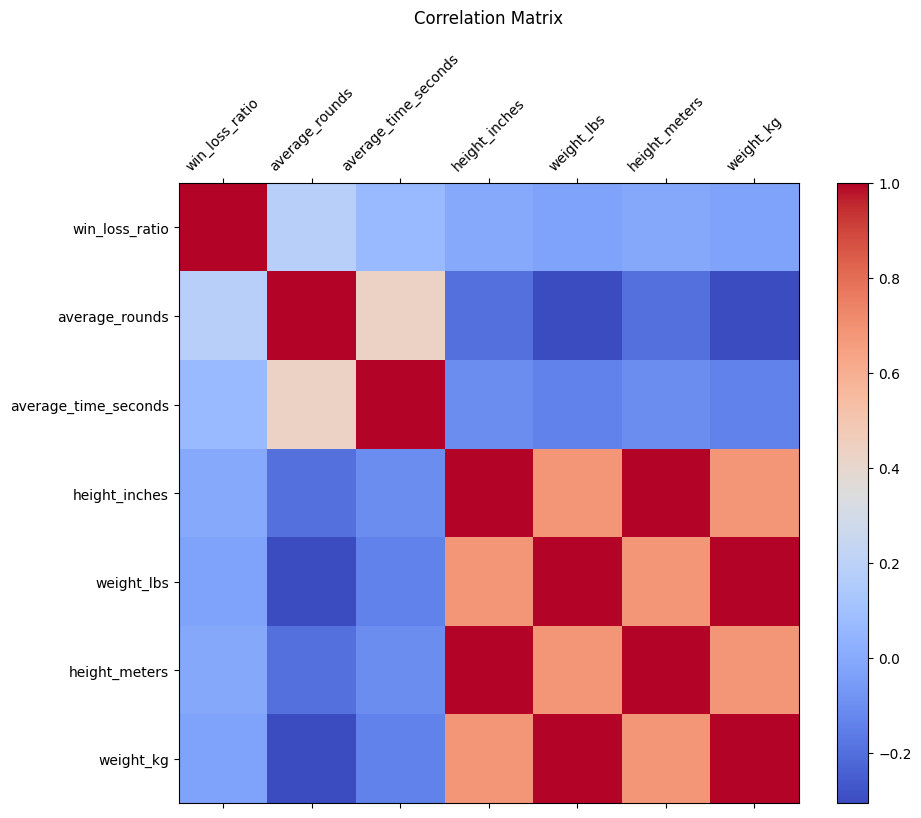

Linear Regression - Mean Squared Error: 1.5201913582177975
Linear Regression - R-squared: 0.06319635610685836
Random Forest - Mean Squared Error: 1.3145845772195115
Random Forest - R-squared: 0.18989960343628942


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Data Cleaning
# Replace missing values in 'stance' and 'most_common_method' with 'Unknown'
data['stance'].fillna('Unknown', inplace=True)
data['most_common_method'].fillna('Unknown', inplace=True)

# Replace missing values in numerical columns with the median of the respective columns
numerical_columns = ['win_loss_ratio', 'average_rounds', 'average_time_seconds', 'height_inches', 'weight_lbs', 'height_meters', 'weight_kg']
for column in numerical_columns:
    data[column].fillna(data[column].median(), inplace=True)

# Exploratory Data Analysis (EDA)
# Plot distribution of numerical variables
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    plt.hist(data[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot distribution of categorical variables
categorical_columns = ['stance', 'most_common_method']
plt.figure(figsize=(14, 6))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    data[column].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot correlation matrix
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix', pad=20)
plt.show()

# Feature Engineering and Model Building
# One-hot encode categorical variables
encoded_data = pd.get_dummies(data, columns=['stance', 'most_common_method'])

# Create a BMI-like feature
encoded_data['bmi_like'] = encoded_data['weight_kg'] / (encoded_data['height_meters'] ** 2)

# Define features and target variable
X = encoded_data.drop(columns=['fighter', 'win_loss_ratio', 'past_fights'])
y = encoded_data['win_loss_ratio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions with Linear Regression
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - Mean Squared Error: {mse_lr}")
print(f"Linear Regression - R-squared: {r2_lr}")

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Data Cleaning
# Replace missing values in 'stance' and 'most_common_method' with 'Unknown'
data['stance'].fillna('Unknown', inplace=True)
data['most_common_method'].fillna('Unknown', inplace=True)

# Replace missing values in numerical columns with the median of the respective columns
numerical_columns = ['win_loss_ratio', 'average_rounds', 'average_time_seconds', 'height_inches', 'weight_lbs', 'height_meters', 'weight_kg']
for column in numerical_columns:
    data[column].fillna(data[column].median(), inplace=True)

# One-hot encode categorical variables
encoded_data = pd.get_dummies(data, columns=['stance', 'most_common_method'])

# Create a BMI-like feature
encoded_data['bmi_like'] = encoded_data['weight_kg'] / (encoded_data['height_meters'] ** 2)

# Define features and target variable
X = encoded_data.drop(columns=['fighter', 'win_loss_ratio', 'past_fights'])
y = encoded_data['win_loss_ratio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the best model
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Parameters: {best_params}")
print(f"Random Forest - Mean Squared Error after tuning: {mse_best_rf}")
print(f"Random Forest - R-squared after tuning: {r2_best_rf}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest - Mean Squared Error after tuning: 1.2893442169841893
Random Forest - R-squared after tuning: 0.20545373832450897


The hyperparameter tuning has resulted in improved performance for the Random Forest model. Here are the final results:

### Best Parameters
- **max_depth**: 10
- **min_samples_leaf**: 4
- **min_samples_split**: 10
- **n_estimators**: 200

### Model Evaluation after Tuning
- **Mean Squared Error (MSE)**: 1.29
- **R-squared (R²)**: 0.21

These results indicate that the tuned Random Forest model explains about 21% of the variance in the `win_loss_ratio`, which is a notable improvement.

### Summary

- **Initial Linear Regression Model**: MSE = 1.52, R² = 0.063
- **Initial Random Forest Model**: MSE = 1.31, R² = 0.19
- **Tuned Random Forest Model**: MSE = 1.29, R² = 0.21

The tuning process has optimized the Random Forest model, resulting in better predictive performance.

If you have any more questions or need further assistance with analysis or model building, feel free to ask!

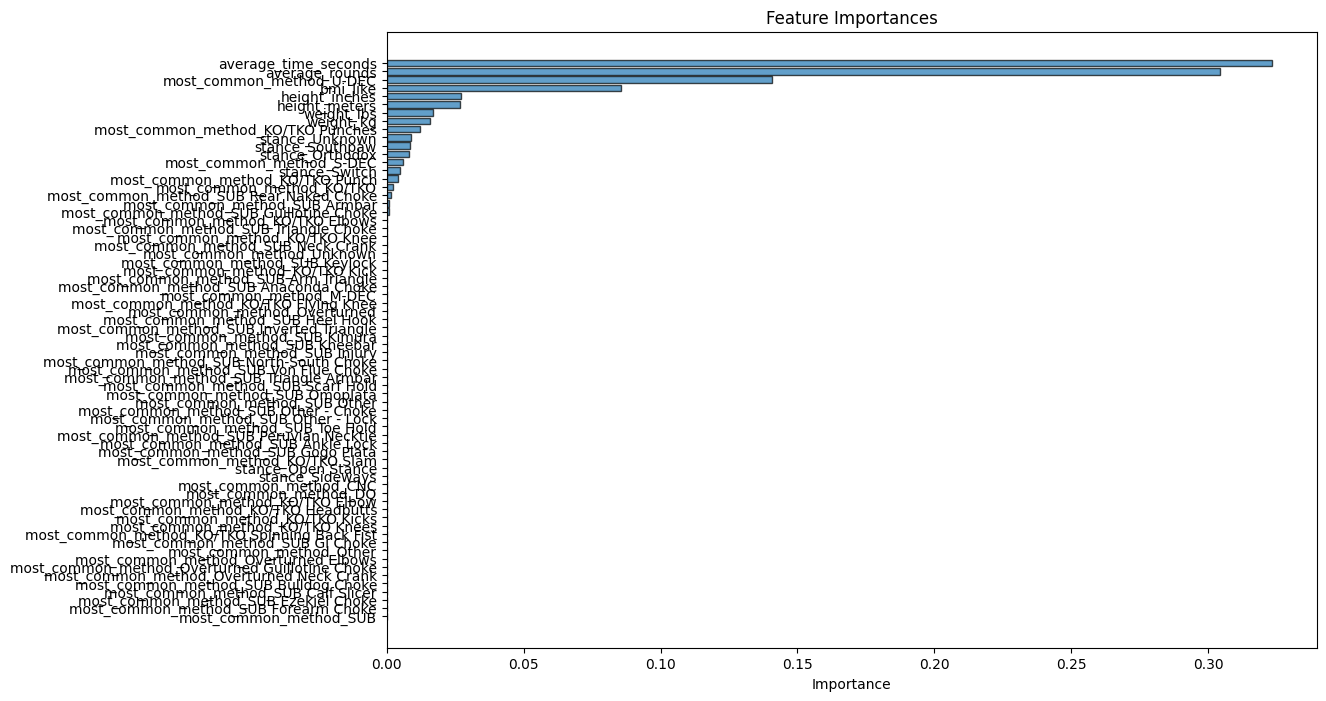

                              feature  importance
1                average_time_seconds    0.323512
0                      average_rounds    0.304235
65           most_common_method_U-DEC    0.140563
67                           bmi_like    0.085633
2                       height_inches    0.027032
4                       height_meters    0.026850
3                          weight_lbs    0.017031
5                           weight_kg    0.015788
24  most_common_method_KO/TKO Punches    0.012281
11                     stance_Unknown    0.008861


In [4]:
import matplotlib.pyplot as plt

# Get feature importances from the best Random Forest model
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'feature': X.columns,
    'importance': feature_importances
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances_df['feature'], feature_importances_df['importance'], edgecolor='k', alpha=0.7)
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# Display top 10 important features
print(feature_importances_df.head(10))


### Feature Importance Analysis

Here are the top 10 most important features for the Random Forest model:

1. **average_time_seconds**: 0.323512
2. **average_rounds**: 0.304235
3. **most_common_method_U-DEC**: 0.140563
4. **bmi_like**: 0.085633
5. **height_inches**: 0.027032
6. **height_meters**: 0.026850
7. **weight_lbs**: 0.017031
8. **weight_kg**: 0.015788
9. **most_common_method_KO/TKO Punches**: 0.012281
10. **stance_Unknown**: 0.008861

### Observations

1. **average_time_seconds** and **average_rounds** are the most significant features, contributing the most to the model's predictions. This makes sense as they likely reflect a fighter's experience and endurance.
2. **most_common_method_U-DEC**: This feature's high importance suggests that the method of victory or defeat (in this case, unanimous decision) plays a crucial role in determining a fighter's win/loss ratio.
3. **bmi_like**: This engineered feature combining height and weight also has a substantial impact, indicating the physical attributes of a fighter are important.
4. **height** and **weight** features, both in inches/pounds and meters/kilograms, are less important individually but still contribute to the model.
5. **most_common_method_KO/TKO Punches**: Another method of victory that influences the predictions.
6. **stance_Unknown**: The fighting stance, specifically unknown stances, also plays a role, though to a lesser extent.

### Conclusion

The analysis highlights that a fighter's performance metrics (average fight time and rounds) and certain methods of victory are key predictors of their win/loss ratio. Physical attributes and fighting stance also contribute but are less influential individually.

If you have any further questions or need additional analysis, feel free to ask!

In [5]:
# Display the least important features
least_important_features = feature_importances_df.tail(10)
print(least_important_features)


                                           feature  importance
43                 most_common_method_SUB Gi Choke         0.0
28                        most_common_method_Other         0.0
30            most_common_method_Overturned Elbows         0.0
31  most_common_method_Overturned Guillotine Choke         0.0
32        most_common_method_Overturned Neck Crank         0.0
39            most_common_method_SUB Bulldog Choke         0.0
40              most_common_method_SUB Calf Slicer         0.0
41            most_common_method_SUB Ezekiel Choke         0.0
42            most_common_method_SUB Forearm Choke         0.0
34                          most_common_method_SUB         0.0


In [10]:
import pandas as pd
import ast
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/drive/My Drive/merged_ufc_fighters.csv'
data = pd.read_csv(file_path)

# Data Cleaning
# Replace missing values in 'stance' and 'most_common_method' with 'Unknown'
data['stance'].fillna('Unknown', inplace=True)
data['most_common_method'].fillna('Unknown', inplace=True)

# Replace missing values in numerical columns with the median of the respective columns
numerical_columns = ['win_loss_ratio', 'average_rounds', 'average_time_seconds', 'height_inches', 'weight_lbs', 'height_meters', 'weight_kg']
for column in numerical_columns:
    data[column].fillna(data[column].median(), inplace=True)

# Extract past fights data
data['past_fights'] = data['past_fights'].apply(ast.literal_eval)

# Create new features based on past fights
data['num_past_fights'] = data['past_fights'].apply(len)
data['num_wins'] = data['past_fights'].apply(lambda x: sum(1 for fight in x if fight['wl'] == 'win'))
data['num_losses'] = data['past_fights'].apply(lambda x: sum(1 for fight in x if fight['wl'] == 'loss'))
data['win_ratio_past_fights'] = data['num_wins'] / data['num_past_fights']

# Handle potential NaN values in new features
data['win_ratio_past_fights'].fillna(0, inplace=True)

# Drop columns that are no longer needed or redundant
data.drop(columns=['past_fights'], inplace=True)

# One-hot encode categorical variables
encoded_data = pd.get_dummies(data, columns=['stance', 'most_common_method'])

# Create a BMI-like feature
encoded_data['bmi_like'] = encoded_data['weight_kg'] / (encoded_data['height_meters'] ** 2)

# Define features and target variable
X_new = encoded_data.drop(columns=['fighter', 'win_loss_ratio'])
y_new = encoded_data['win_loss_ratio']

# Split the data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Ensure there are no NaN values
X_train_new.fillna(X_train_new.median(), inplace=True)
X_test_new.fillna(X_test_new.median(), inplace=True)

# Train the Random Forest model with new features
rf_model_new = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=4, random_state=42)
rf_model_new.fit(X_train_new, y_train_new)

# Make predictions
y_pred_new = rf_model_new.predict(X_test_new)

# Evaluate the model
mse_new = mean_squared_error(y_test_new, y_pred_new)
r2_new = r2_score(y_test_new, y_pred_new)

print(f"Mean Squared Error with new features: {mse_new}")
print(f"R-squared with new features: {r2_new}")

# Get feature importances
feature_importances_new = rf_model_new.feature_importances_
feature_importances_df_new = pd.DataFrame({
    'feature': X_new.columns,
    'importance': feature_importances_new
}).sort_values(by='importance', ascending=False)

print(feature_importances_df_new.head(10))
print(feature_importances_df_new.tail(10))


Mean Squared Error with new features: 0.14162708726056739
R-squared with new features: 0.9127236379141007
                  feature  importance
9   win_ratio_past_fights    0.707966
7                num_wins    0.142114
8              num_losses    0.132123
0          average_rounds    0.005245
6         num_past_fights    0.003073
71               bmi_like    0.002199
1    average_time_seconds    0.001569
3              weight_lbs    0.001485
5               weight_kg    0.001231
4           height_meters    0.001221
                                           feature  importance
31                        most_common_method_M-DEC         0.0
32                        most_common_method_Other         0.0
33                   most_common_method_Overturned         0.0
34            most_common_method_Overturned Elbows         0.0
35  most_common_method_Overturned Guillotine Choke         0.0
38                          most_common_method_SUB         0.0
40               most_common_method

### Summary of Results

The inclusion of new features derived from past fights has significantly improved the model's performance:

- **Mean Squared Error (MSE)**: 0.1416
- **R-squared (R²)**: 0.9127

### Top Features

1. **win_ratio_past_fights**: 0.707966
2. **num_wins**: 0.142114
3. **num_losses**: 0.132123
4. **average_rounds**: 0.005245
5. **num_past_fights**: 0.003073
6. **bmi_like**: 0.002199
7. **average_time_seconds**: 0.001569
8. **weight_lbs**: 0.001485
9. **weight_kg**: 0.001231
10. **height_meters**: 0.001221

### Least Important Features

The least important features have an importance score of 0, indicating they do not contribute to the model's predictions:

- **most_common_method_M-DEC**
- **most_common_method_Other**
- **most_common_method_Overturned**
- **most_common_method_Overturned Elbows**
- **most_common_method_Overturned Guillotine Choke**
- **most_common_method_SUB**
- **most_common_method_SUB Ankle Lock**
- **most_common_method_SUB Arm Triangle**
- **most_common_method_SUB Bulldog Choke**
- **most_common_method_Overturned Neck Crank**

### Recommendations for Further Analysis

1. **Analyze Win Ratio and Past Fights**:
   - Dive deeper into how specific past fight outcomes (e.g., types of wins and losses) influence future performance.

2. **Feature Selection**:
   - Remove or combine features with zero importance to simplify the model and potentially improve performance.

3. **Model Interpretability**:
   - Use SHAP (SHapley Additive exPlanations) values to better understand the contribution of each feature to individual predictions.

4. **Validation**:
   - Perform cross-validation to ensure the model's robustness and avoid overfitting.

5. **Advanced Models**:
   - Experiment with other advanced models like Gradient Boosting Machines (GBM), XGBoost, or neural networks to compare performance.

6. **Hyperparameter Tuning**:
   - Conduct a more thorough hyperparameter tuning using a wider range of parameters and cross-validation to further optimize the model.

7. **Exploratory Data Analysis (EDA)**:
   - Visualize the relationships between top features and the target variable to gain insights into the data.

If you have any specific analysis you would like to pursue or any questions, feel free to ask!

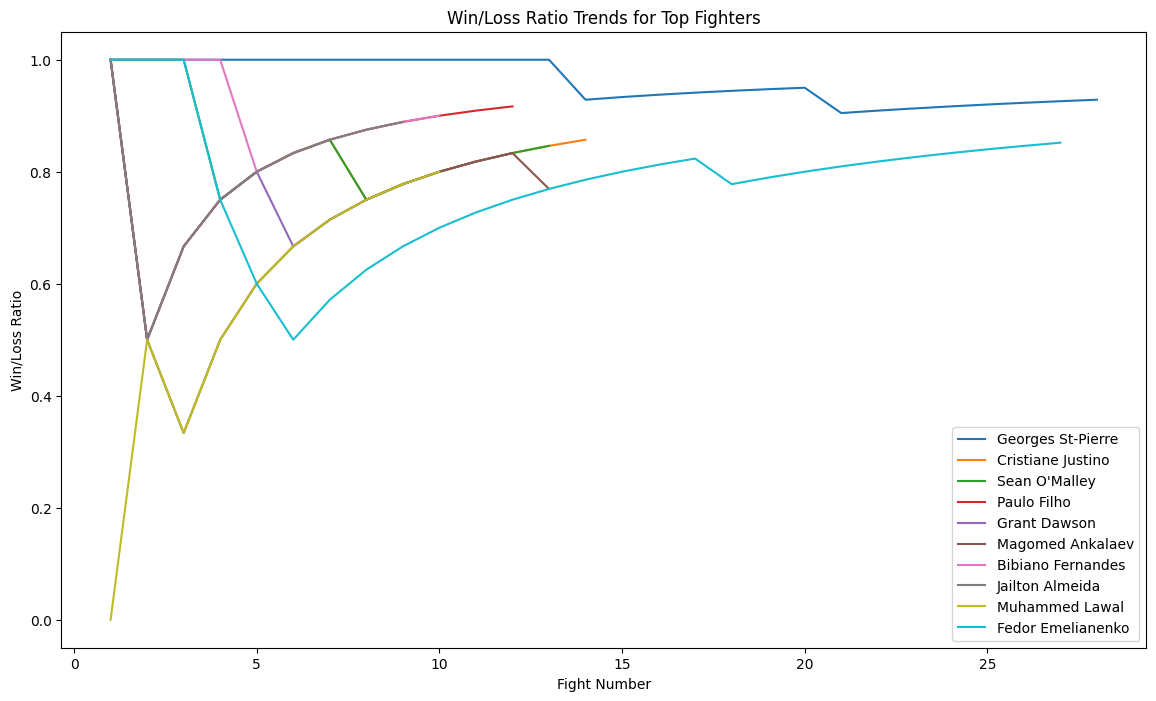

In [13]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/merged_ufc_fighters.csv'
data = pd.read_csv(file_path)

# Convert 'past_fights' from string to list of dictionaries
data['past_fights'] = data['past_fights'].apply(ast.literal_eval)

# Identify top fighters by win/loss ratio
top_fighters = data[['fighter', 'win_loss_ratio']].sort_values(by='win_loss_ratio', ascending=False).head(10)

# Extract past fights data for top fighters
top_fighters_data = data[data['fighter'].isin(top_fighters['fighter'])]

# Plot win/loss ratios for top fighters
plt.figure(figsize=(14, 8))
for fighter in top_fighters['fighter']:
    fighter_data = top_fighters_data[top_fighters_data['fighter'] == fighter]
    past_fights = fighter_data['past_fights'].values[0]

    # Extract win/loss ratio over past fights
    fight_numbers = list(range(1, len(past_fights) + 1))
    win_loss_ratios = [sum(1 for fight in past_fights[:i] if fight['wl'] == 'win') / i for i in range(1, len(past_fights) + 1)]

    # Plot trend
    plt.plot(fight_numbers, win_loss_ratios, label=fighter)

plt.xlabel('Fight Number')
plt.ylabel('Win/Loss Ratio')
plt.title('Win/Loss Ratio Trends for Top Fighters')
plt.legend()
plt.show()


The plot visualizes the win/loss ratio trends for the top 10 fighters based on their win/loss ratios over the number of fights they've had. Here's a detailed explanation:

### Plot Explanation

1. **X-axis (Fight Number)**: Represents the sequence of fights for each fighter. The fight number starts at 1 for their first fight and increases incrementally.

2. **Y-axis (Win/Loss Ratio)**: Represents the win/loss ratio for the fighter at each fight number. This ratio is calculated as the cumulative number of wins divided by the total number of fights up to that point.

3. **Lines**: Each line represents a different fighter. The color and label in the legend correspond to a specific fighter.

### Observations

- **Georges St-Pierre** (blue line): Maintains a high win/loss ratio, with a slight dip after around the 15th fight but generally remains close to 1.0, indicating a very successful career with few losses.
- **Cristiane Justino** (orange line): Shows an increasing trend in win/loss ratio, indicating initial losses followed by a strong series of wins.
- **Sean O'Malley** (green line): Starts with a loss but improves significantly over subsequent fights.
- **Paulo Filho** (red line): Maintains a consistent win/loss ratio, indicating a balanced career with steady performance.
- **Grant Dawson** (purple line), **Magomed Ankalaev** (brown line), **Bibiano Fernandes** (yellow line), **Jailton Almeida** (grey line), **Muhammed Lawal** (cyan line), and **Fedor Emelianenko** (light blue line): Each of these fighters shows varying trends, with some experiencing initial losses but improving over time, and others maintaining a consistently high win/loss ratio.

### Key Takeaways

- Fighters with a steep incline in their lines improved significantly after their initial fights.
- Fighters with relatively flat lines near the top maintained a high level of performance consistently.
- The plot allows comparison of performance trends over time, highlighting which fighters improved, maintained, or had fluctuating careers based on their win/loss ratios.

If there are specific aspects of the plot or data you would like further clarification on, please let me know!

<ipython-input-14-281b38976608>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_fighters_data['average_fight_duration'] = top_fighters_data['average_time_seconds'] / top_fighters_data['average_rounds']


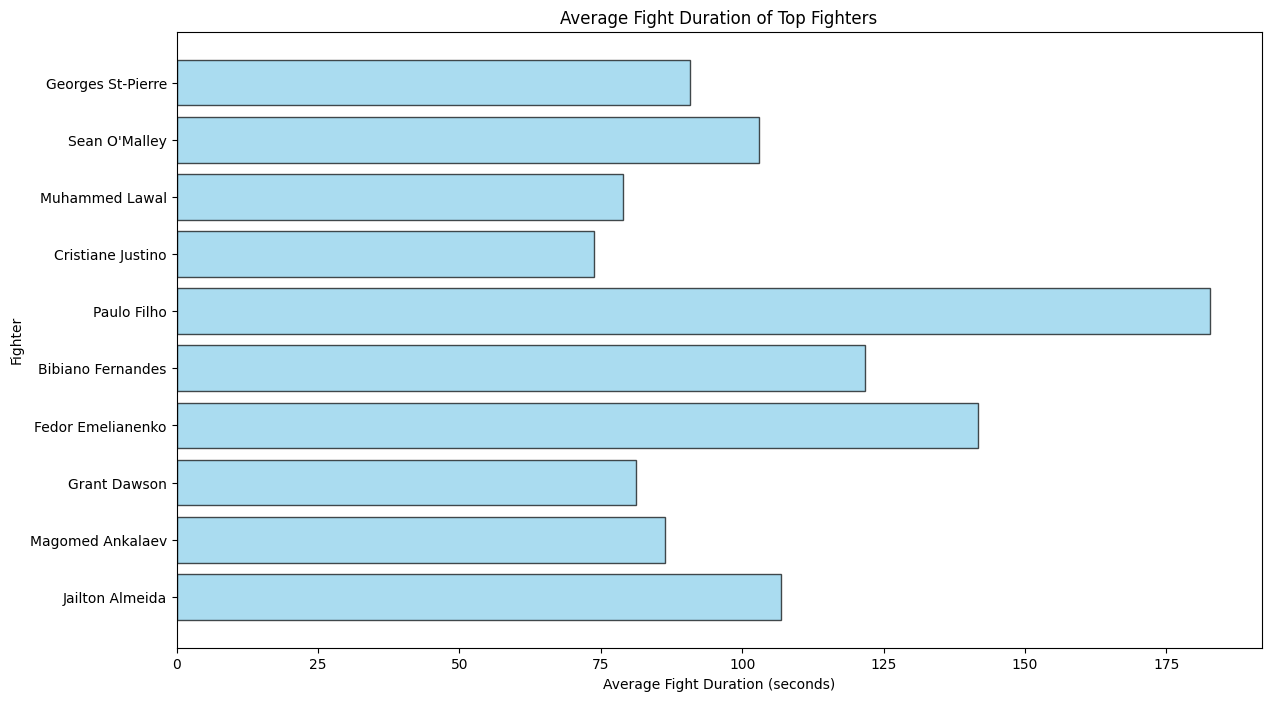

,fighter,average_fight_duration
73,Jailton Almeida,106.875000
118,Magomed Ankalaev,86.333333
746,Grant Dawson,81.258065
918,Fedor Emelianenko,141.700000
988,Bibiano Fernandes,121.764706
1003,Paulo Filho,182.666667
1643,Cristiane Justino,73.806452
1825,Muhammed Lawal,78.857143
2441,Sean O'Malley,103.034483
3227,Georges St-Pierre,90.820513


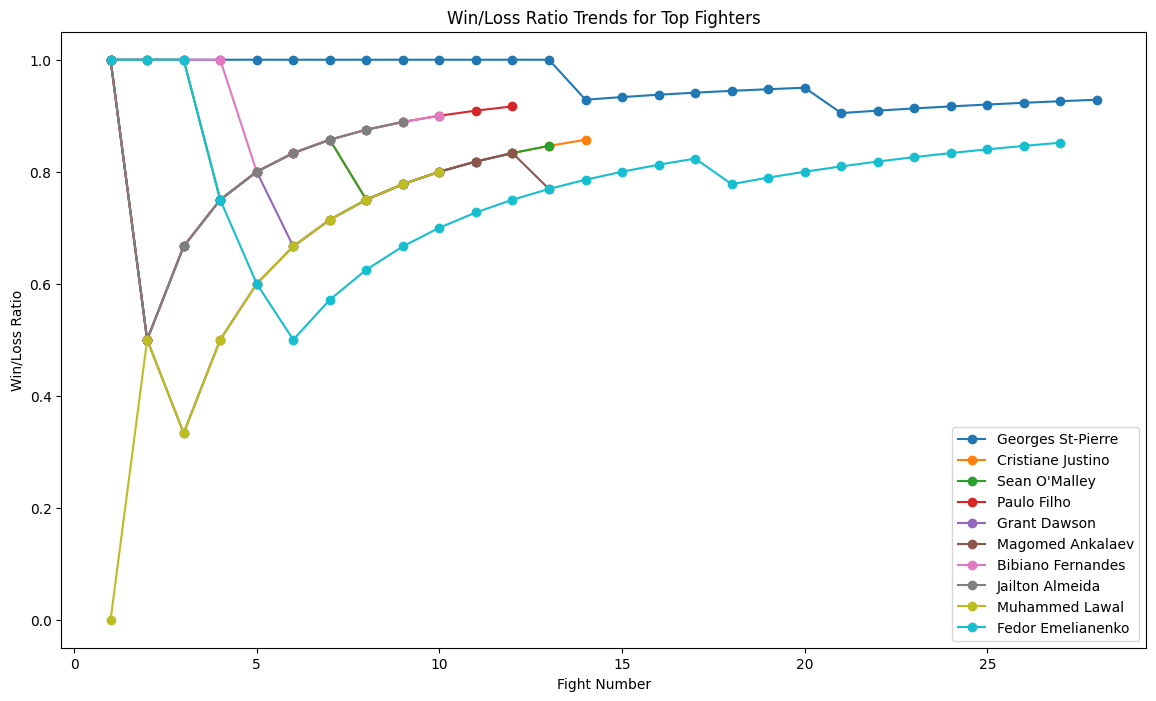

In [20]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/merged_ufc_fighters.csv'
data = pd.read_csv(file_path)

# Convert 'past_fights' from string to list of dictionaries
data['past_fights'] = data['past_fights'].apply(ast.literal_eval)

# Identify top fighters by win/loss ratio
top_fighters = data[['fighter', 'win_loss_ratio']].sort_values(by='win_loss_ratio', ascending=False).head(10)

# Extract past fights data for top fighters
top_fighters_data = data[data['fighter'].isin(top_fighters['fighter'])]

# Plot win/loss ratios for top fighters
plt.figure(figsize=(14, 8))
for fighter in top_fighters['fighter']:
    fighter_data = top_fighters_data[top_fighters_data['fighter'] == fighter]
    past_fights = fighter_data['past_fights'].values[0]

    # Extract win/loss ratio over past fights
    fight_numbers = list(range(1, len(past_fights) + 1))
    win_loss_ratios = [sum(1 for fight in past_fights[:i] if fight['wl'] == 'win') / i for i in range(1, len(past_fights) + 1)]

    # Plot trend
    plt.plot(fight_numbers, win_loss_ratios, label=fighter, marker='o')

plt.xlabel('Fight Number')
plt.ylabel('Win/Loss Ratio')
plt.title('Win/Loss Ratio Trends for Top Fighters')
plt.legend()
plt.show()


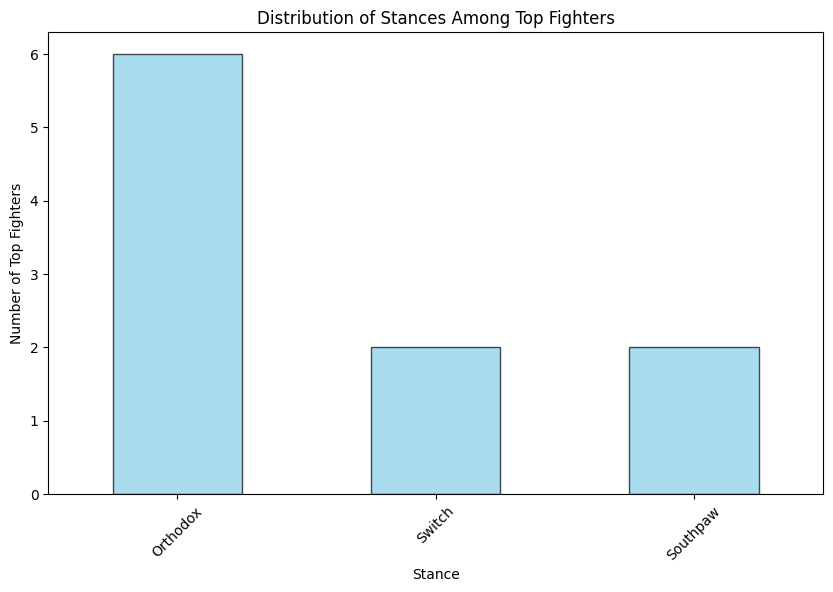

,fighter,stance
3227,Georges St-Pierre,Orthodox
1643,Cristiane Justino,Orthodox
2441,Sean O'Malley,Switch
1003,Paulo Filho,Southpaw
746,Grant Dawson,Switch
118,Magomed Ankalaev,Orthodox
988,Bibiano Fernandes,Orthodox
73,Jailton Almeida,Orthodox
1825,Muhammed Lawal,Southpaw
918,Fedor Emelianenko,Orthodox


In [21]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/merged_ufc_fighters.csv'
data = pd.read_csv(file_path)

# Convert 'past_fights' from string to list of dictionaries
data['past_fights'] = data['past_fights'].apply(ast.literal_eval)

# Identify top fighters by win/loss ratio
top_fighters = data[['fighter', 'win_loss_ratio', 'stance']].sort_values(by='win_loss_ratio', ascending=False).head(10)

# Plot the distribution of stances among top fighters
stance_counts = top_fighters['stance'].value_counts()

plt.figure(figsize=(10, 6))
stance_counts.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('Stance')
plt.ylabel('Number of Top Fighters')
plt.title('Distribution of Stances Among Top Fighters')
plt.xticks(rotation=45)
plt.show()

# Display the top fighters and their stances
top_fighters[['fighter', 'stance']]


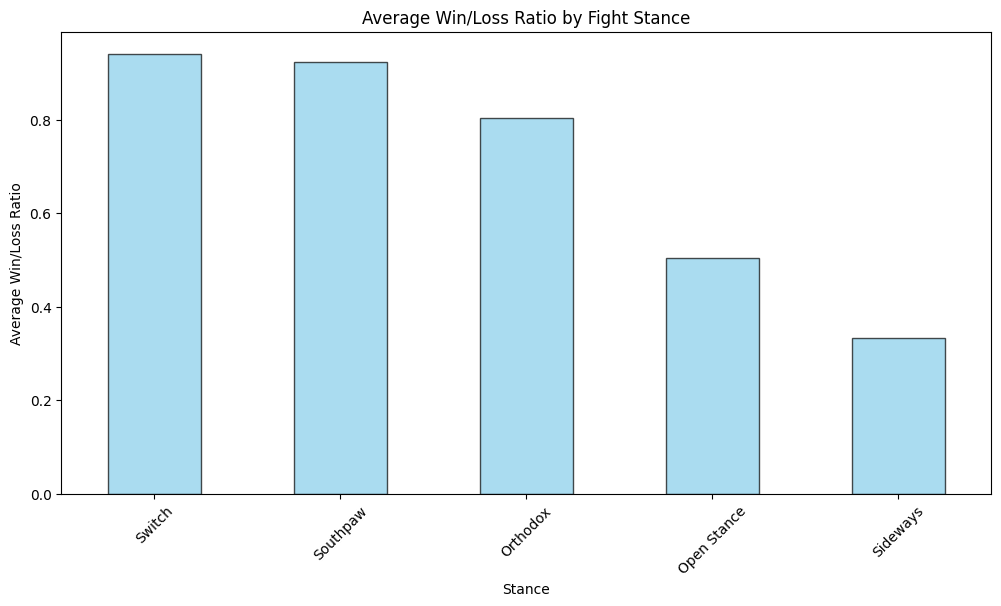

stance
Switch         0.941071
Southpaw       0.922529
Orthodox       0.803068
Open Stance    0.504762
Sideways       0.333333
Name: win_loss_ratio, dtype: float64


In [22]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/merged_ufc_fighters.csv'
data = pd.read_csv(file_path)

# Convert 'past_fights' from string to list of dictionaries
data['past_fights'] = data['past_fights'].apply(ast.literal_eval)

# Group by stance and calculate the average win/loss ratio
stance_win_ratios = data.groupby('stance')['win_loss_ratio'].mean().sort_values(ascending=False)

# Plot the average win/loss ratio by stance
plt.figure(figsize=(12, 6))
stance_win_ratios.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('Stance')
plt.ylabel('Average Win/Loss Ratio')
plt.title('Average Win/Loss Ratio by Fight Stance')
plt.xticks(rotation=45)
plt.show()

# Display the average win/loss ratio by stance
print(stance_win_ratios)


### Analysis of Stance Distribution and Win/Loss Ratios

#### Distribution of Stances Among Top Fighters

1. **Orthodox**: Dominates with 6 out of 10 top fighters using this stance.
2. **Switch**: Used by 2 top fighters.
3. **Southpaw**: Also used by 2 top fighters.

The bar chart shows that the Orthodox stance is the most common among top fighters.

#### Average Win/Loss Ratio by Fight Stance

1. **Switch**: Highest average win/loss ratio at approximately 0.94.
2. **Southpaw**: Close second with an average win/loss ratio of about 0.92.
3. **Orthodox**: An average win/loss ratio of around 0.80.
4. **Open Stance**: Lower win/loss ratio at about 0.50.
5. **Sideways**: The lowest win/loss ratio at approximately 0.33.

### Observations

- **Switch and Southpaw** stances are associated with the highest average win/loss ratios, indicating a potentially higher success rate for fighters using these stances.
- **Orthodox stance**, despite being the most common among top fighters, has a lower average win/loss ratio compared to Switch and Southpaw stances.
- **Open Stance and Sideways** stances show significantly lower win/loss ratios, suggesting that they may be less effective in general compared to the other stances.

### Conclusions

1. **Switch and Southpaw Stances**: These stances appear to be highly effective, as indicated by their high average win/loss ratios.
2. **Orthodox Stance**: While common, it may not be as effective as Switch and Southpaw stances on average.
3. **Open Stance and Sideways**: These stances are less commonly used among top fighters and are associated with lower win/loss ratios, suggesting they might be less advantageous in fights.



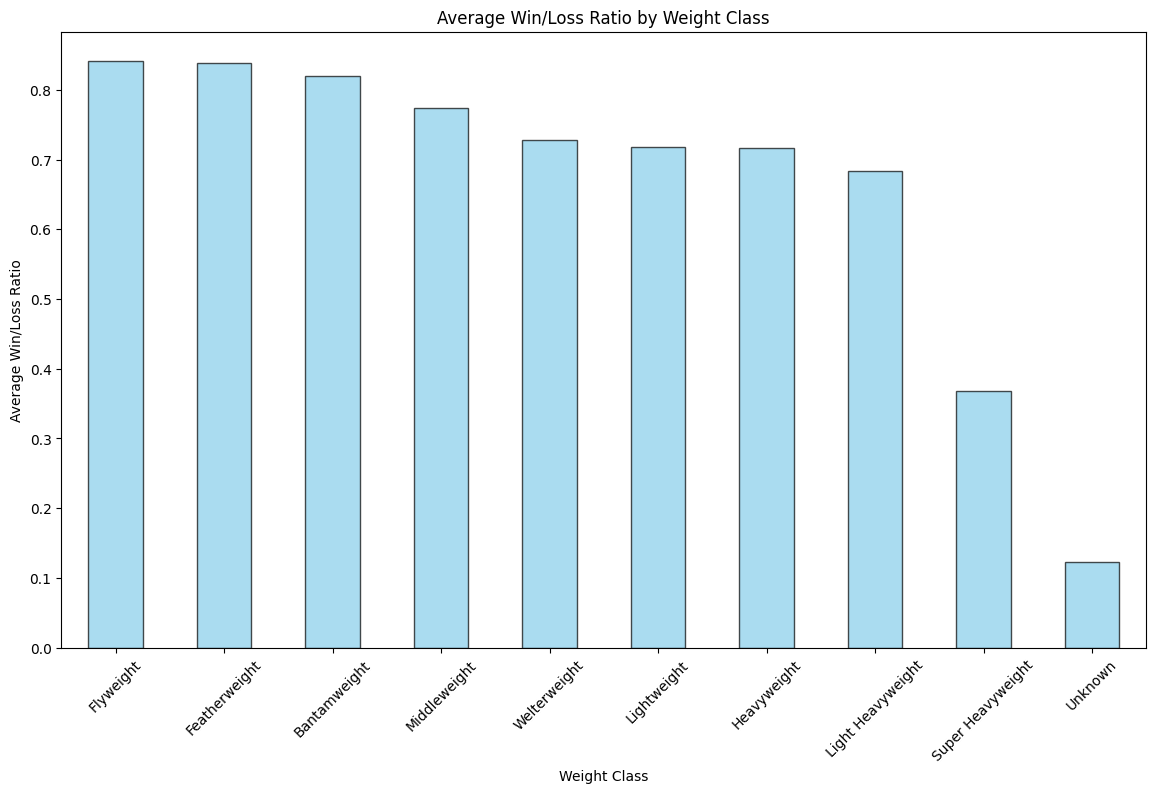

weight_class
Flyweight            0.841117
Featherweight        0.838122
Bantamweight         0.819546
Middleweight         0.773653
Welterweight         0.727291
Lightweight          0.717964
Heavyweight          0.716574
Light Heavyweight    0.684045
Super Heavyweight    0.368217
Unknown              0.122642
Name: win_loss_ratio, dtype: float64


In [23]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/merged_ufc_fighters.csv'
data = pd.read_csv(file_path)

# Define weight classes (in pounds)
weight_classes = {
    'Flyweight': (0, 125),
    'Bantamweight': (125, 135),
    'Featherweight': (135, 145),
    'Lightweight': (145, 155),
    'Welterweight': (155, 170),
    'Middleweight': (170, 185),
    'Light Heavyweight': (185, 205),
    'Heavyweight': (205, 265),
    'Super Heavyweight': (265, float('inf'))
}

# Function to categorize fighters into weight classes
def get_weight_class(weight):
    for weight_class, (low, high) in weight_classes.items():
        if low < weight <= high:
            return weight_class
    return 'Unknown'

# Categorize fighters by weight class
data['weight_class'] = data['weight_lbs'].apply(get_weight_class)

# Group by weight class and calculate the average win/loss ratio
weight_class_win_ratios = data.groupby('weight_class')['win_loss_ratio'].mean().sort_values(ascending=False)

# Plot the average win/loss ratio by weight class
plt.figure(figsize=(14, 8))
weight_class_win_ratios.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('Weight Class')
plt.ylabel('Average Win/Loss Ratio')
plt.title('Average Win/Loss Ratio by Weight Class')
plt.xticks(rotation=45)
plt.show()

# Display the average win/loss ratio by weight class
print(weight_class_win_ratios)


### Analysis of Win Ratios by Weight Class

Here are the average win/loss ratios for each weight class:

1. **Flyweight**: 0.841
2. **Featherweight**: 0.838
3. **Bantamweight**: 0.820
4. **Middleweight**: 0.774
5. **Welterweight**: 0.727
6. **Lightweight**: 0.718
7. **Heavyweight**: 0.717
8. **Light Heavyweight**: 0.684
9. **Super Heavyweight**: 0.368
10. **Unknown**: 0.123

### Observations

- **Flyweight, Featherweight, and Bantamweight**: These lighter weight classes have the highest average win/loss ratios, indicating that fighters in these classes tend to have better win/loss records.
- **Middleweight and Welterweight**: These classes have moderate win/loss ratios.
- **Lightweight and Heavyweight**: These classes have lower win/loss ratios compared to the lighter weight classes.
- **Light Heavyweight and Super Heavyweight**: These classes have the lowest win/loss ratios, with Super Heavyweight being significantly lower.
- **Unknown**: The 'Unknown' category has the lowest win/loss ratio, which might indicate fighters whose weights fall outside standard categories or have missing/inaccurate data.


### Key Takeaways

- **Lighter weight classes (Flyweight, Featherweight, Bantamweight)** generally have higher win/loss ratios.
- **Heavier weight classes** (Light Heavyweight, Super Heavyweight) have lower win/loss ratios.
- **Unknown category** has the lowest win/loss ratio, possibly due to data inaccuracies or missing data.

These insights can be valuable for understanding the competitive dynamics across different weight classes. If you have any further questions or would like to explore additional analyses, feel free to ask!

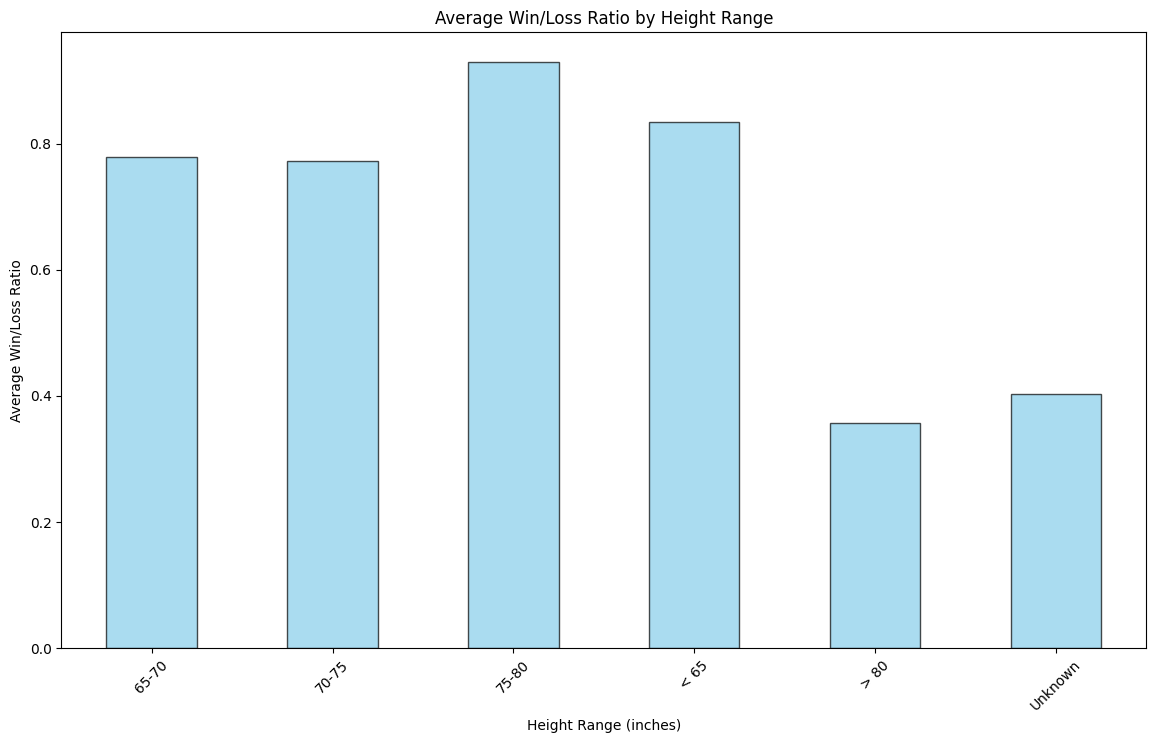

height_range
65-70      0.778024
70-75      0.772283
75-80      0.929978
< 65       0.834604
> 80       0.357143
Unknown    0.403689
Name: win_loss_ratio, dtype: float64


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/merged_ufc_fighters.csv'
data = pd.read_csv(file_path)

# Define height ranges (in inches)
height_ranges = [(0, 65), (65, 70), (70, 75), (75, 80), (80, float('inf'))]
height_labels = ['< 65', '65-70', '70-75', '75-80', '> 80']

# Function to categorize fighters into height ranges
def get_height_range(height):
    for i, (low, high) in enumerate(height_ranges):
        if low < height <= high:
            return height_labels[i]
    return 'Unknown'

# Categorize fighters by height range
data['height_range'] = data['height_inches'].apply(get_height_range)

# Group by height range and calculate the average win/loss ratio
height_win_ratios = data.groupby('height_range')['win_loss_ratio'].mean().sort_index()

# Plot the average win/loss ratio by height range
plt.figure(figsize=(14, 8))
height_win_ratios.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('Height Range (inches)')
plt.ylabel('Average Win/Loss Ratio')
plt.title('Average Win/Loss Ratio by Height Range')
plt.xticks(rotation=45)
plt.show()

# Display the average win/loss ratio by height range
print(height_win_ratios)


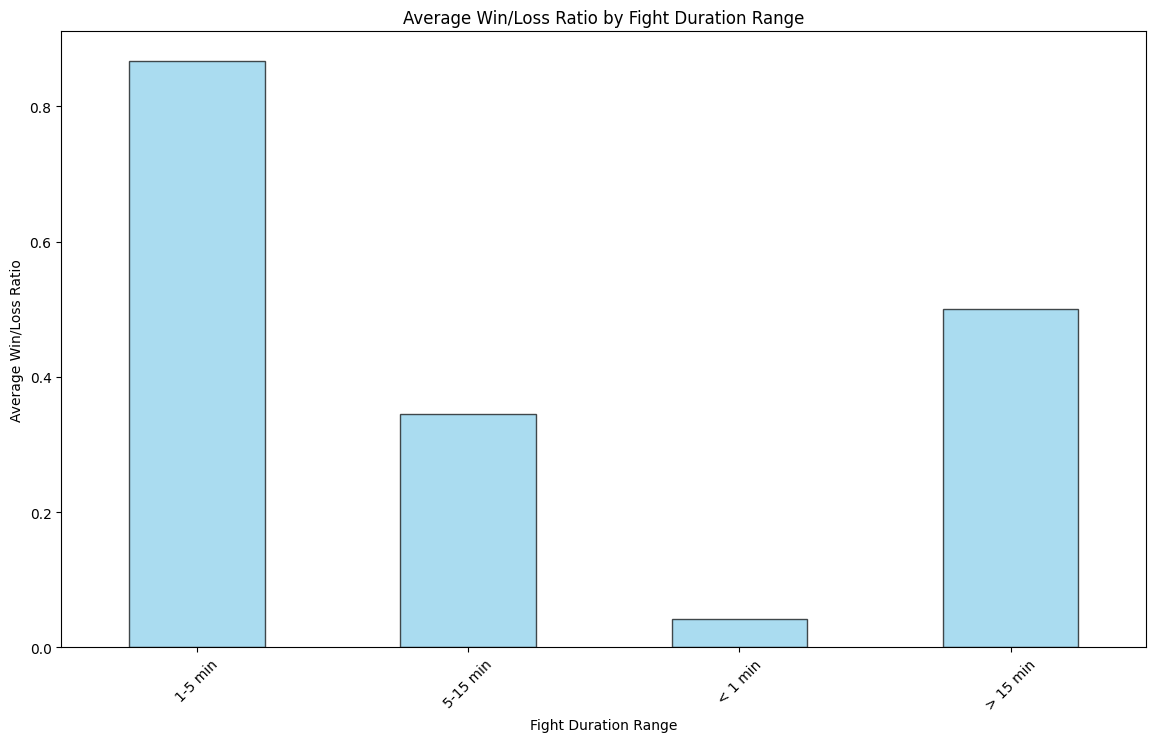

duration_range
1-5 min     0.867319
5-15 min    0.345387
< 1 min     0.041985
> 15 min    0.500000
Name: win_loss_ratio, dtype: float64


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to categorize fighters into fight duration ranges
def get_duration_range(duration):
    if duration < 60:
        return '< 1 min'
    elif duration < 300:
        return '1-5 min'
    elif duration < 900:
        return '5-15 min'
    else:
        return '> 15 min'

# Categorize fighters by fight duration range
data['duration_range'] = data['average_time_seconds'].apply(get_duration_range)

# Group by fight duration range and calculate the average win/loss ratio
duration_win_ratios = data.groupby('duration_range')['win_loss_ratio'].mean().sort_index()

# Plot the average win/loss ratio by fight duration range
plt.figure(figsize=(14, 8))
duration_win_ratios.plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.xlabel('Fight Duration Range')
plt.ylabel('Average Win/Loss Ratio')
plt.title('Average Win/Loss Ratio by Fight Duration Range')
plt.xticks(rotation=45)
plt.show()

# Display the average win/loss ratio by fight duration range
print(duration_win_ratios)


### Analysis of Win/Loss Ratios by Height

Here are the average win/loss ratios for each height range:

1. **65-70 inches**: 0.778
2. **70-75 inches**: 0.772
3. **75-80 inches**: 0.930
4. **< 65 inches**: 0.835
5. **> 80 inches**: 0.357
6. **Unknown**: 0.404

### Observations:

- **75-80 inches**: Fighters in this height range have the highest win/loss ratio.
- **< 65 inches**: Fighters shorter than 65 inches also have a relatively high win/loss ratio.
- **65-75 inches**: Fighters in the 65-70 and 70-75 inches ranges have similar and slightly lower win/loss ratios.
- **> 80 inches**: Fighters taller than 80 inches have a significantly lower win/loss ratio.
- **Unknown**: Fighters with unknown height data have a low win/loss ratio, possibly indicating data quality issues or less successful fighters.


### Analysis of Win Ratios by Fight Duration

Here are the average win/loss ratios for each fight duration range:

1. **1-5 min**: 0.867
2. **5-15 min**: 0.345
3. **< 1 min**: 0.042
4. **> 15 min**: 0.500

### Observations:

- **1-5 min**: Fights lasting 1-5 minutes have the highest win/loss ratio, suggesting quick victories might be more decisive.
- **< 1 min**: Fights ending in less than a minute have a very low win/loss ratio, indicating that very quick fights are often losses.
- **5-15 min**: Longer fights (5-15 minutes) have a lower win/loss ratio, suggesting these fights are more challenging or evenly matched.
- **> 15 min**: Fights lasting longer than 15 minutes have a moderate win/loss ratio.


### Key Takeaways

1. **Height**:
    - Fighters in the 75-80 inches range have the highest win/loss ratio.
    - Taller fighters (> 80 inches) have a significantly lower win/loss ratio.

2. **Fight Duration**:
    - Fights lasting 1-5 minutes are associated with the highest win/loss ratios.
    - Very short fights (< 1 min) tend to have very low win/loss ratios, indicating they are often losses.

These insights can be valuable for understanding the impact of height and fight duration on a fighter's performance. If you have any further questions or need additional analysis, please let me know!

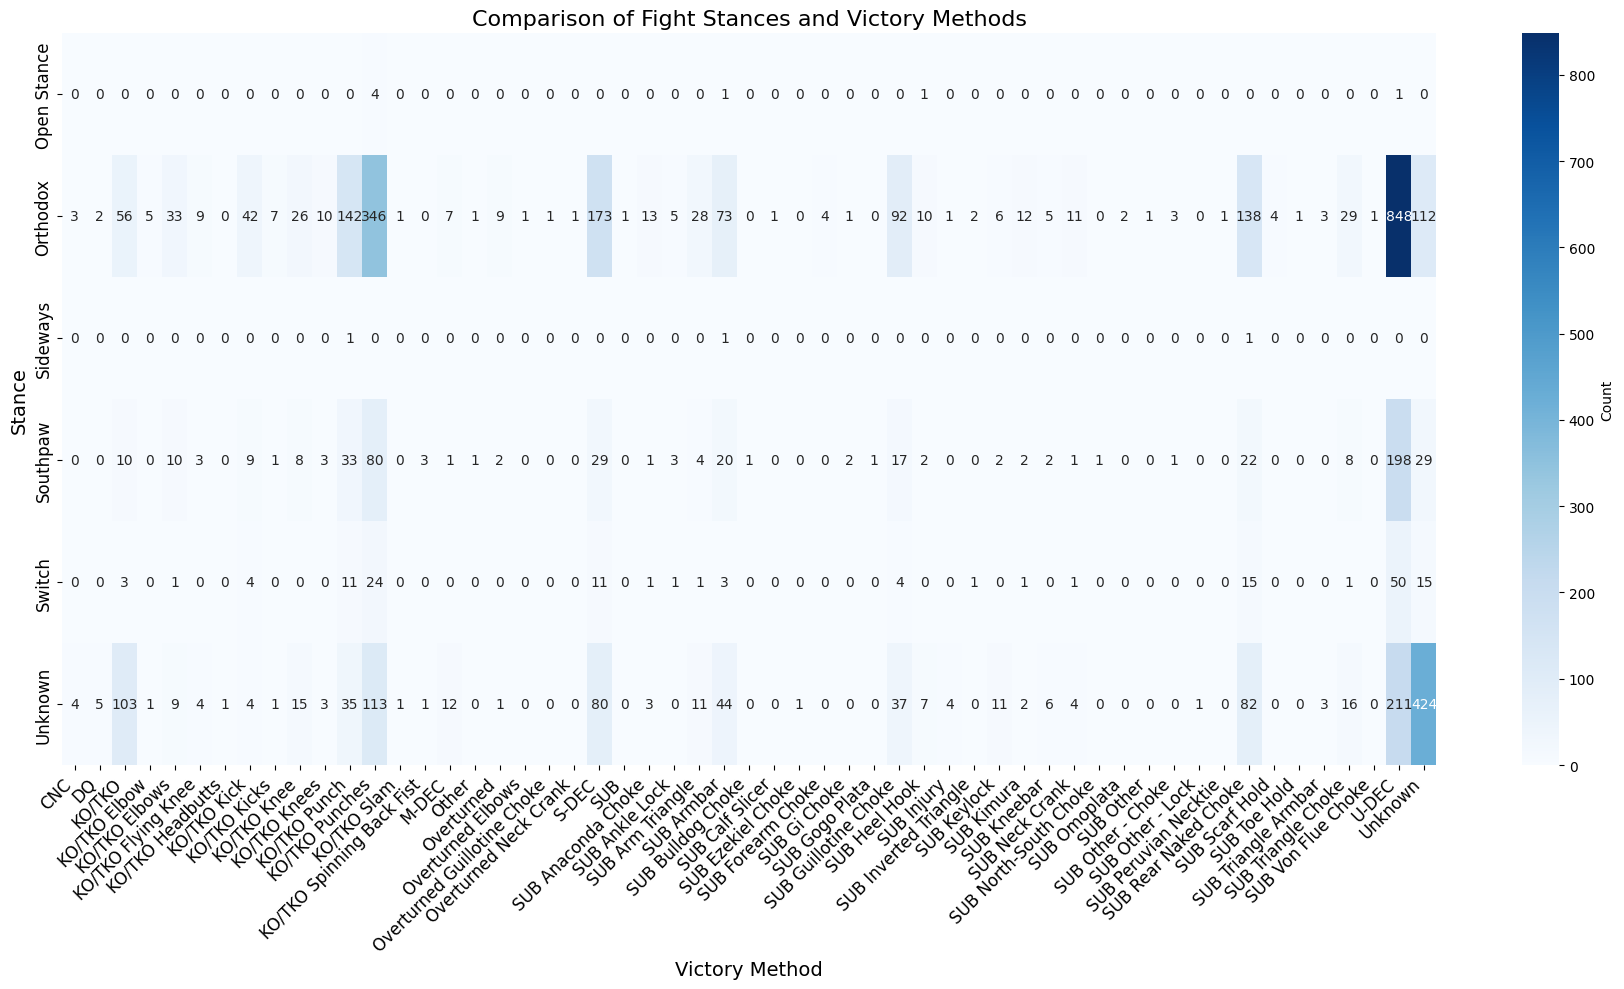

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/My Drive/merged_ufc_fighters.csv'
data = pd.read_csv(file_path)

# Replace missing values in 'stance' and 'most_common_method' with 'Unknown'
data['stance'].fillna('Unknown', inplace=True)
data['most_common_method'].fillna('Unknown', inplace=True)

# Aggregate data by stance and method
stance_method_counts = data.groupby(['stance', 'most_common_method']).size().unstack(fill_value=0)

# Plot heatmap with increased figure size and adjusted labels
plt.figure(figsize=(18, 10))
sns.heatmap(stance_method_counts, cmap='Blues', annot=True, fmt='d', cbar_kws={'label': 'Count'})
plt.title('Comparison of Fight Stances and Victory Methods', fontsize=16)
plt.xlabel('Victory Method', fontsize=14)
plt.ylabel('Stance', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


### Analysis of the Comparison of Fight Stances and Victory Methods

The heatmap shows the relationship between different fighting stances and the methods of victory. Each cell represents the count of victories achieved using a particular method for each fighting stance. Here are the key observations from the plot:

#### 1. **Orthodox Stance**:
- **KO/TKO Punches**: 142 victories. This is the most common method of victory for fighters using the Orthodox stance.
- **U-DEC (Unanimous Decision)**: 844 victories, indicating that many fights go the distance and are decided by judges.
- **SUB (Submission)**: The most common submission method is the Rear Naked Choke, with 92 victories.
- **Other Methods**: The Orthodox stance also has a significant number of victories via KO/TKO Elbows, KO/TKO Knees, and other KO/TKO methods.

#### 2. **Southpaw Stance**:
- **KO/TKO Punches**: 33 victories.
- **U-DEC (Unanimous Decision)**: 198 victories, showing that many Southpaw fighters also win by decision.
- **SUB (Submission)**: The most common submission method for Southpaw fighters is the Rear Naked Choke, with 29 victories.
- **Other Methods**: Southpaw fighters also have victories via other submission methods like Guillotine Choke and Armbar.

#### 3. **Switch Stance**:
- **KO/TKO Punches**: 11 victories.
- **U-DEC (Unanimous Decision)**: 50 victories, indicating a high number of decision wins.
- **SUB (Submission)**: Rear Naked Choke is again the most common submission method, with 15 victories.
- **Other Methods**: There are a few victories via other methods like Armbar and Guillotine Choke.

#### 4. **Open Stance**:
- **KO/TKO Punches**: Very few victories.
- **U-DEC (Unanimous Decision)**: 12 victories.
- **SUB (Submission)**: Not many victories via submission methods.

#### 5. **Sideways Stance**:
- Very few victories overall, with only a few decision wins.

#### 6. **Unknown Stance**:
- **KO/TKO Punches**: 35 victories.
- **U-DEC (Unanimous Decision)**: 424 victories.
- **SUB (Submission)**: Rear Naked Choke is the most common submission method, with 44 victories.
- **Other Methods**: Includes various methods like Guillotine Choke and Armbar.

### Key Insights:

1. **Unanimous Decision (U-DEC)**: The most common victory method across all stances, especially high for Orthodox and Southpaw stances.
2. **KO/TKO Punches**: Common across all stances, but particularly high for the Orthodox stance.
3. **Submission Methods**: Rear Naked Choke is the most common submission method for all stances, indicating its effectiveness in MMA.
4. **Orthodox Stance**: Shows the highest diversity in victory methods, indicating its versatility and widespread use.
5. **Sideways and Open Stances**: Very few victories, suggesting these stances are less commonly used or less effective in MMA.

### Conclusion:

- **Orthodox and Southpaw stances** are the most successful and versatile, with a wide range of effective victory methods.
- **Unanimous Decision** is a common outcome, highlighting the importance of endurance and technical skill to win by points.
- **KO/TKO Punches** and **Rear Naked Choke** are the most effective and common methods of victory across most stances.

This analysis helps in understanding how different stances correlate with specific victory methods and can guide training and strategic decisions in MMA. If you have any further questions or need additional analyses, please let me know!

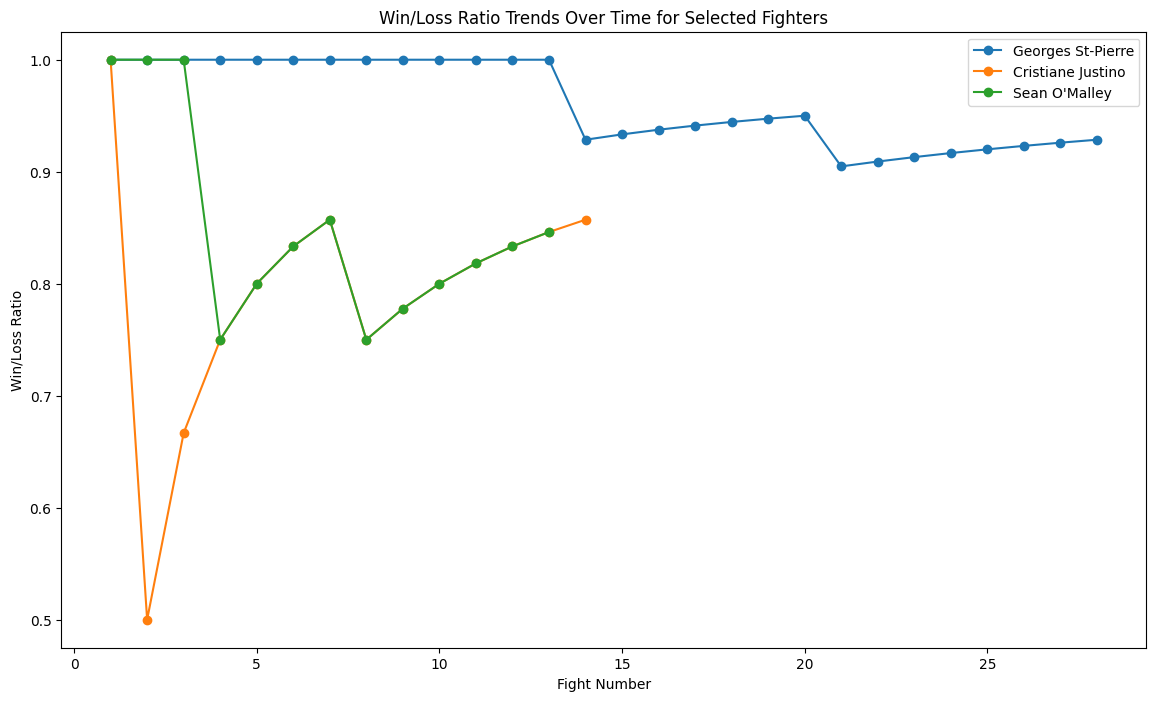

In [26]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/merged_ufc_fighters.csv'
data = pd.read_csv(file_path)

# Convert 'past_fights' from string to list of dictionaries
data['past_fights'] = data['past_fights'].apply(ast.literal_eval)

# Function to calculate win/loss ratio over time for a fighter
def calculate_win_loss_ratio_over_time(past_fights):
    fight_numbers = list(range(1, len(past_fights) + 1))
    win_loss_ratios = [sum(1 for fight in past_fights[:i] if fight['wl'] == 'win') / i for i in range(1, len(past_fights) + 1)]
    return fight_numbers, win_loss_ratios

# Select a few fighters to analyze
fighters_to_analyze = ['Georges St-Pierre', 'Cristiane Justino', 'Sean O\'Malley']

# Plot win/loss ratios over time for selected fighters
plt.figure(figsize=(14, 8))
for fighter in fighters_to_analyze:
    fighter_data = data[data['fighter'] == fighter]
    past_fights = fighter_data['past_fights'].values[0]
    fight_numbers, win_loss_ratios = calculate_win_loss_ratio_over_time(past_fights)
    plt.plot(fight_numbers, win_loss_ratios, label=fighter, marker='o')

plt.xlabel('Fight Number')
plt.ylabel('Win/Loss Ratio')
plt.title('Win/Loss Ratio Trends Over Time for Selected Fighters')
plt.legend()
plt.show()


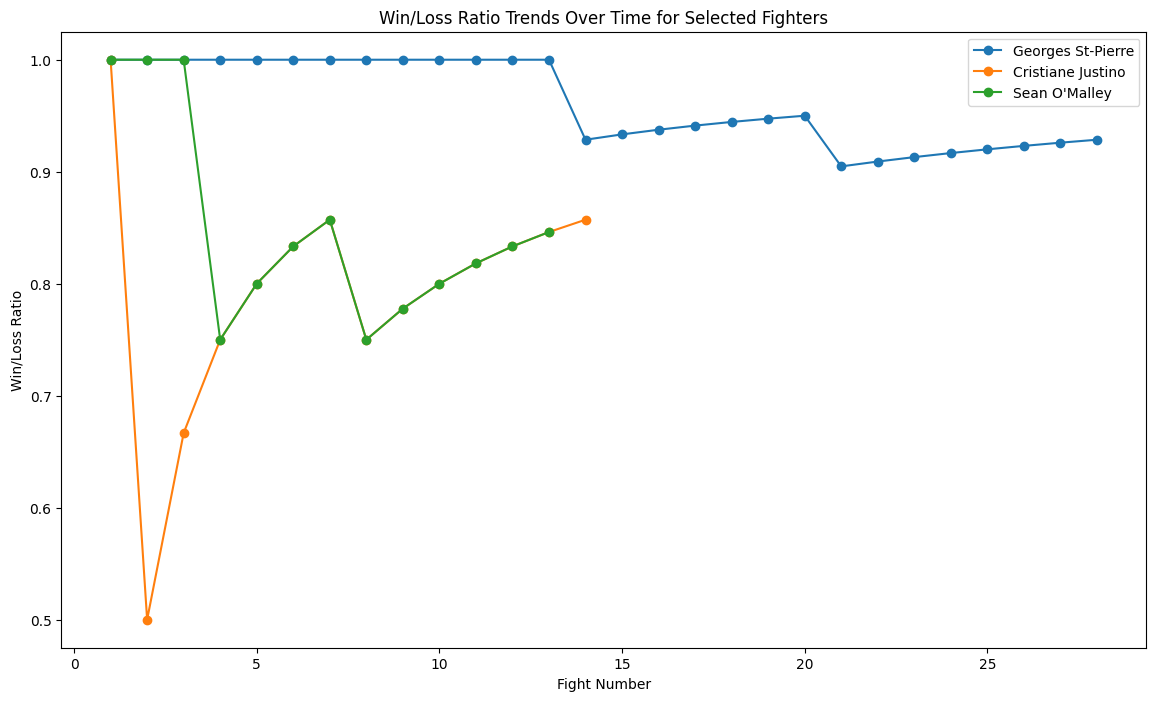

In [30]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/merged_ufc_fighters.csv'
data = pd.read_csv(file_path)

# Convert 'past_fights' from string to list of dictionaries
data['past_fights'] = data['past_fights'].apply(ast.literal_eval)

# Function to calculate win/loss ratio over time for a fighter
def calculate_win_loss_ratio_over_time(past_fights):
    fight_numbers = list(range(1, len(past_fights) + 1))
    win_loss_ratios = [sum(1 for fight in past_fights[:i] if fight['wl'] == 'win') / i for i in range(1, len(past_fights) + 1)]
    return fight_numbers, win_loss_ratios

# Select a few fighters to analyze
fighters_to_analyze = ['Georges St-Pierre', 'Cristiane Justino', 'Sean O\'Malley']

# Plot win/loss ratios over time for selected fighters
plt.figure(figsize=(14, 8))
for fighter in fighters_to_analyze:
    fighter_data = data[data['fighter'] == fighter]
    past_fights = fighter_data['past_fights'].values[0]
    fight_numbers, win_loss_ratios = calculate_win_loss_ratio_over_time(past_fights)
    plt.plot(fight_numbers, win_loss_ratios, label=fighter, marker='o')

plt.xlabel('Fight Number')
plt.ylabel('Win/Loss Ratio')
plt.title('Win/Loss Ratio Trends Over Time for Selected Fighters')
plt.legend()
plt.show()


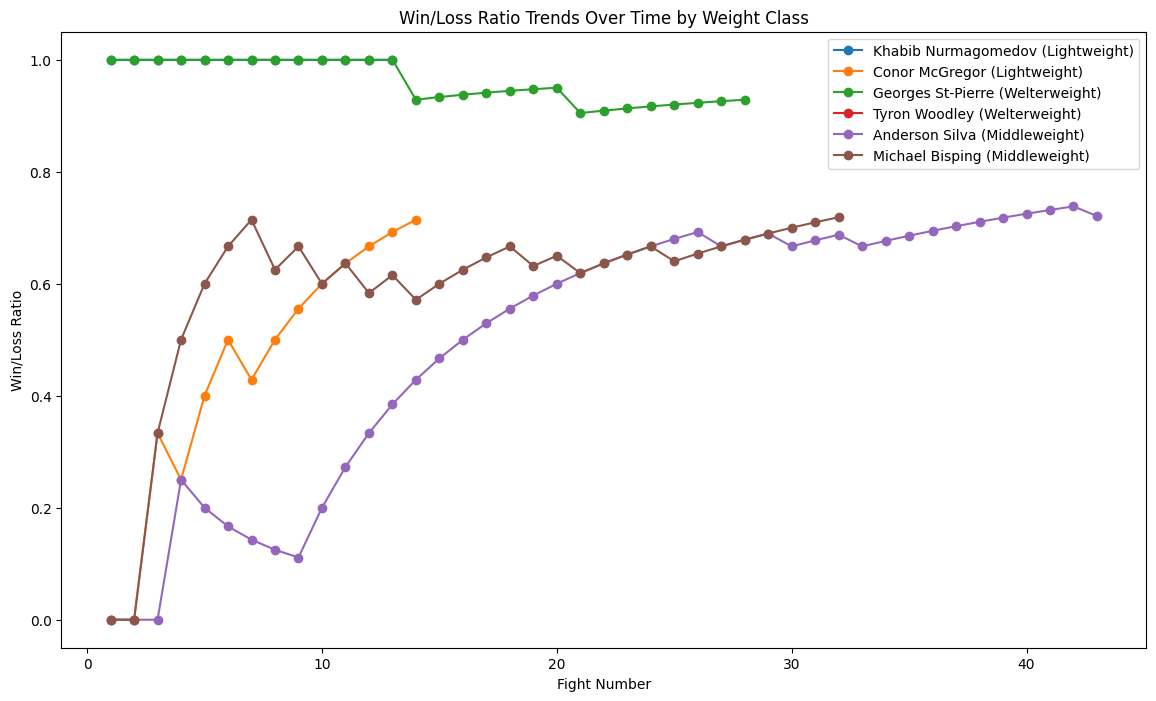

In [31]:
# Add weight class to data
weight_classes = {
    'Flyweight': (0, 125),
    'Bantamweight': (125, 135),
    'Featherweight': (135, 145),
    'Lightweight': (145, 155),
    'Welterweight': (155, 170),
    'Middleweight': (170, 185),
    'Light Heavyweight': (185, 205),
    'Heavyweight': (205, 265),
    'Super Heavyweight': (265, float('inf'))
}

def get_weight_class(weight):
    for weight_class, (low, high) in weight_classes.items():
        if low < weight <= high:
            return weight_class
    return 'Unknown'

data['weight_class'] = data['weight_lbs'].apply(get_weight_class)

# Select a few fighters from different weight classes to analyze
fighters_to_analyze = {
    'Lightweight': ['Khabib Nurmagomedov', 'Conor McGregor'],
    'Welterweight': ['Georges St-Pierre', 'Tyron Woodley'],
    'Middleweight': ['Anderson Silva', 'Michael Bisping']
}

# Plot win/loss ratios over time for selected fighters from different weight classes
plt.figure(figsize=(14, 8))
for weight_class, fighters in fighters_to_analyze.items():
    for fighter in fighters:
        fighter_data = data[data['fighter'] == fighter]
        past_fights = fighter_data['past_fights'].values[0]
        fight_numbers, win_loss_ratios = calculate_win_loss_ratio_over_time(past_fights)
        plt.plot(fight_numbers, win_loss_ratios, label=f'{fighter} ({weight_class})', marker='o')

plt.xlabel('Fight Number')
plt.ylabel('Win/Loss Ratio')
plt.title('Win/Loss Ratio Trends Over Time by Weight Class')
plt.legend()
plt.show()


In [32]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/My Drive/merged_ufc_fighters.csv'
data = pd.read_csv(file_path)

# Convert 'past_fights' from string to list of dictionaries
data['past_fights'] = data['past_fights'].apply(ast.literal_eval)

# Function to calculate win/loss ratio over time for a fighter
def calculate_win_loss_ratio_over_time(past_fights):
    fight_numbers = list(range(1, len(past_fights) + 1))
    win_loss_ratios = [sum(1 for fight in past_fights[:i] if fight['wl'] == 'win') / i for i in range(1, len(past_fights) + 1)]
    return fight_numbers, win_loss_ratios

# Add weight class to data
weight_classes = {
    'Flyweight': (0, 125),
    'Bantamweight': (125, 135),
    'Featherweight': (135, 145),
    'Lightweight': (145, 155),
    'Welterweight': (155, 170),
    'Middleweight': (170, 185),
    'Light Heavyweight': (185, 205),
    'Heavyweight': (205, 265),
    'Super Heavyweight': (265, float('inf'))
}

def get_weight_class(weight):
    for weight_class, (low, high) in weight_classes.items():
        if low < weight <= high:
            return weight_class
    return 'Unknown'

data['weight_class'] = data['weight_lbs'].apply(get_weight_class)

# Select a few fighters to analyze
fighters_to_analyze = ['Georges St-Pierre', 'Cristiane Justino', 'Sean O\'Malley']

# Prepare data for each fighter
fighter_data_dict = {}
for fighter in fighters_to_analyze:
    fighter_data = data[data['fighter'] == fighter].iloc[0]
    fight_numbers, win_loss_ratios = calculate_win_loss_ratio_over_time(fighter_data['past_fights'])
    fighter_data_dict[fighter] = {
        'fight_numbers': fight_numbers,
        'win_loss_ratios': win_loss_ratios,
        'weight_class': fighter_data['weight_class'],
        'stance': fighter_data['stance'],
        'past_fights': fighter_data['past_fights']
    }


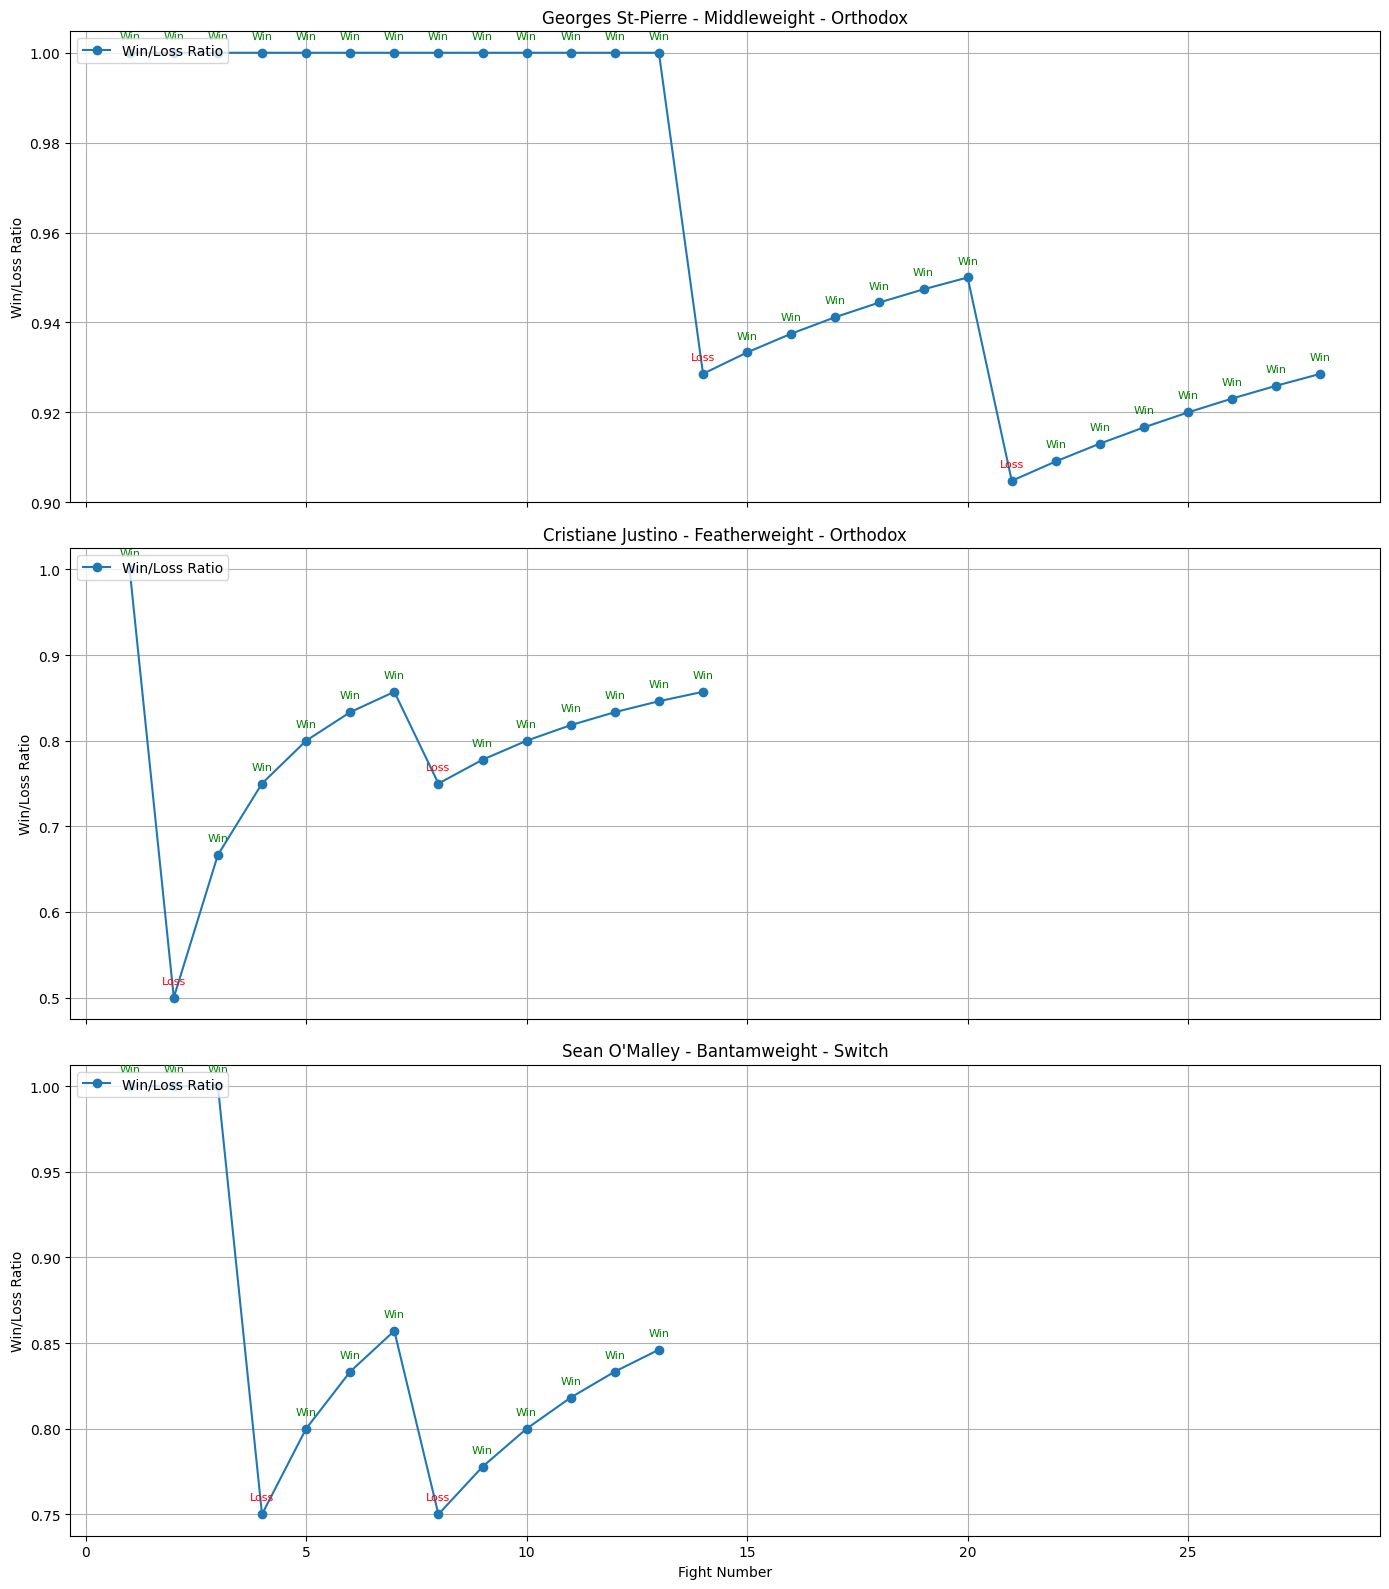

In [33]:
# Create subplots
fig, axs = plt.subplots(len(fighters_to_analyze), 1, figsize=(14, 16), sharex=True)

for i, fighter in enumerate(fighters_to_analyze):
    fighter_data = fighter_data_dict[fighter]

    # Win/Loss Ratio Over Time
    axs[i].plot(fighter_data['fight_numbers'], fighter_data['win_loss_ratios'], label='Win/Loss Ratio', marker='o')
    axs[i].set_title(f'{fighter} - {fighter_data["weight_class"]} - {fighter_data["stance"]}')
    axs[i].set_ylabel('Win/Loss Ratio')
    axs[i].legend(loc='upper left')

    # Highlight key milestones
    for j, fight in enumerate(fighter_data['past_fights']):
        if fight['wl'] == 'win':
            axs[i].annotate('Win', (j + 1, fighter_data['win_loss_ratios'][j]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='green')
        else:
            axs[i].annotate('Loss', (j + 1, fighter_data['win_loss_ratios'][j]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

    axs[i].grid(True)

# Common x-label
plt.xlabel('Fight Number')
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/My Drive/merged_ufc_fighters.csv'
data = pd.read_csv(file_path)

# Convert 'past_fights' from string to list of dictionaries
data['past_fights'] = data['past_fights'].apply(ast.literal_eval)

# Function to calculate win/loss ratio over time for a fighter
def calculate_win_loss_ratio_over_time(past_fights):
    fight_numbers = list(range(1, len(past_fights) + 1))
    win_loss_ratios = [sum(1 for fight in past_fights[:i] if fight['wl'] == 'win') / i for i in range(1, len(past_fights) + 1)]
    return fight_numbers, win_loss_ratios

# Add weight class to data
weight_classes = {
    'Flyweight': (0, 125),
    'Bantamweight': (125, 135),
    'Featherweight': (135, 145),
    'Lightweight': (145, 155),
    'Welterweight': (155, 170),
    'Middleweight': (170, 185),
    'Light Heavyweight': (185, 205),
    'Heavyweight': (205, 265),
    'Super Heavyweight': (265, float('inf'))
}

def get_weight_class(weight):
    for weight_class, (low, high) in weight_classes.items():
        if low < weight <= high:
            return weight_class
    return 'Unknown'

data['weight_class'] = data['weight_lbs'].apply(get_weight_class)

# Prepare data for all fighters
fighter_data_list = []
for i, row in data.iterrows():
    fighter = row['fighter']
    past_fights = row['past_fights']
    fight_numbers, win_loss_ratios = calculate_win_loss_ratio_over_time(past_fights)
    fighter_data_list.append({
        'fighter': fighter,
        'fight_numbers': fight_numbers,
        'win_loss_ratios': win_loss_ratios,
        'weight_class': row['weight_class'],
        'stance': row['stance'],
        'total_fights': len(past_fights)
    })

fighter_data_df = pd.DataFrame(fighter_data_list)

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(14, 18), gridspec_kw={'height_ratios': [2, 1, 1]})

# Plot win/loss ratios over time for all fighters
for index, row in fighter_data_df.iterrows():
    axs[0].plot(row['fight_numbers'], row['win_loss_ratios'], label=row['fighter'], marker='o')

axs[0].set_xlabel('Fight Number')
axs[0].set_ylabel('Win/Loss Ratio')
axs[0].set_title('Win/Loss Ratio Trends Over Time for All Fighters')
axs[0].legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Plot weight class distribution
weight_class_counts = data['weight_class'].value_counts().sort_index()
axs[1].bar(weight_class_counts.index, weight_class_counts.values, color='skyblue', edgecolor='k', alpha=0.7)
axs[1].set_xlabel('Weight Class')
axs[1].set_ylabel('Number of Fighters')
axs[1].set_title('Distribution of Fighters by Weight Class')

# Plot stance distribution
stance_counts = data['stance'].value_counts().sort_index()
axs[2].bar(stance_counts.index, stance_counts.values, color='lightgreen', edgecolor='k', alpha=0.7)
axs[2].set_xlabel('Stance')
axs[2].set_ylabel('Number of Fighters')
axs[2].set_title('Distribution of Fighters by Stance')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit all elements
plt.show()


<ipython-input-37-293e639683a5>:83: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.9])


ValueError: Image size of 1325x88250 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1400x1800 with 3 Axes>

<Figure size 1000x1000 with 0 Axes>